In [1]:
%matplotlib inline
from bigbang import repo_loader
import matplotlib.pyplot as plt

/home/nathanhilbert/notebooks/geonodecon/lib/bigbang/
/home/nathanhilbert/notebooks/geonodecon/lib/bigbang/config/config.yml


/home/nathanhilbert/anaconda/envs/geonodecom/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/home/nathanhilbert/anaconda/envs/geonodecom/lib/python2.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)
/home/nathanhilbert/anaconda/envs/geonodecom/lib/python2.7/site-packages/IPython/nbconvert.py:13: ShimWarning: The `IPython.nbconvert` package has been deprecated. You should import from ipython_nbconvert instead.
  "You should import from ipython_nbconvert instead.", ShimWarning)


In [2]:
geonode_git_repo = repo_loader.get_repo("https://github.com/GeoNode/geonode.git", in_type = "remote" )

In [3]:
geonode_git_repo.commit_data

,Unnamed: 0,Commit Message,Committer Email,Committer Name,HEXSHA,Parent Commit,Time,Touched File,Person-ID
0,2015-08-31 09:11:16,Merge branch 'master' of https://github.com/Ge...,simone.dalmasso@gmail.com,Simone Dalmasso,f7834bda0302f75f7242b4a631f7555a7a694a48,"[845cee40d12d6b3284f4254234bffa1ab6e9fb0f, 4f9...",2015-08-31 09:11:16,[docs/tutorials/admin/install/custom_install.t...,2
1,2015-08-31 09:11:08,fix api detail url for non resourcebase\n,simone.dalmasso@gmail.com,Simone Dalmasso,845cee40d12d6b3284f4254234bffa1ab6e9fb0f,[950ca92f8424a70d7ce0f5a59d134a8022c385dd],2015-08-31 09:11:08,[geonode/api/api.py],1
2,2015-08-26 13:31:45,Merge pull request #2255 from smesdaghi/master...,garnertb@gmail.com,Tyler Garner,4f946c4a458f8520ea62bc46020fc51414aa7c16,"[ed869c8c8f9be0bc2341cc9eef445e19c50eb344, d24...",2015-08-26 13:31:45,[geonode/static/geonode/js/upload/LayerInfo.js],3
3,2015-08-26 02:40:38,fixes issue 2254 where any file type that has ...,syrusm@gmail.com,Syrus Mesdaghi,d242c3233a15c12b11c260399a575c703403aef5,[ed869c8c8f9be0bc2341cc9eef445e19c50eb344],2015-08-26 02:40:38,[geonode/static/geonode/js/upload/LayerInfo.js],4
4,2015-08-24 07:31:39,Merge pull request #2252 from dimitri-justeau/...,simone.dalmasso@gmail.com,Simone Dalmasso,ed869c8c8f9be0bc2341cc9eef445e19c50eb344,"[93cb6ef52816e53d987116a05270e423c5fcb3cd, e40...",2015-08-24 07:31:39,[docs/tutorials/admin/install/custom_install.txt],1
5,2015-08-24 06:49:14,[doc] Only one datastore name in custom_inst...,dimitri.justeau@gmail.com,Dimitri Justeau,e40d4a6b832bf916c5cbd6e1855672beef706e1b,[93cb6ef52816e53d987116a05270e423c5fcb3cd],2015-08-24 06:49:14,[docs/tutorials/admin/install/custom_install.txt],5
6,2015-08-21 18:18:19,WCS should use internal geoserver location not...,matt.a.hanson@gmail.com,Matthew Hanson,93cb6ef52816e53d987116a05270e423c5fcb3cd,[15425b7fabbdba5a5574aaad452f897787f2ffe5],2015-08-21 18:18:19,[geonode/geoserver/helpers.py],6
7,2015-08-21 18:16:28,Merge branch 'master' of https://github.com/ge...,matt.a.hanson@gmail.com,Matthew Hanson,15425b7fabbdba5a5574aaad452f897787f2ffe5,"[9ed64fd3457344c7efb0cc8b26c263c170a9b800, 75d...",2015-08-21 18:16:28,[docs/tutorials/devel/projects/projectsintro.t...,5
8,2015-08-21 18:15:53,remove resetting of geoserver url\n,matt.a.hanson@gmail.com,Matthew Hanson,9ed64fd3457344c7efb0cc8b26c263c170a9b800,[8a0280fba1ddc291a65706db4410a9ae0914bc13],2015-08-21 18:15:53,[geonode/contrib/geosites/post_settings.py],5
9,2015-08-17 12:11:56,add missing ul\n,simone.dalmasso@gmail.com,Simone Dalmasso,950ca92f8424a70d7ce0f5a59d134a8022c385dd,[dc87737cf2beecdc44b77a2dc1b40798d7c774aa],2015-08-17 12:11:56,[geonode/layers/templates/layers/layer_detail....,1


In [18]:
from dateutil import parser as dateparser
geonode_git_df = geonode_git_repo.commit_data
geonode_git_df['datetime'] = [dateparser.parse(unnamed_date) for unnamed_date in geonode_git_df["Unnamed: 0"]]



In [39]:
geonode_git_indexed = geonode_git_df.set_index("datetime")
geonode_git_weekly = geonode_git_indexed['Commit Message'].resample("W", how="count")

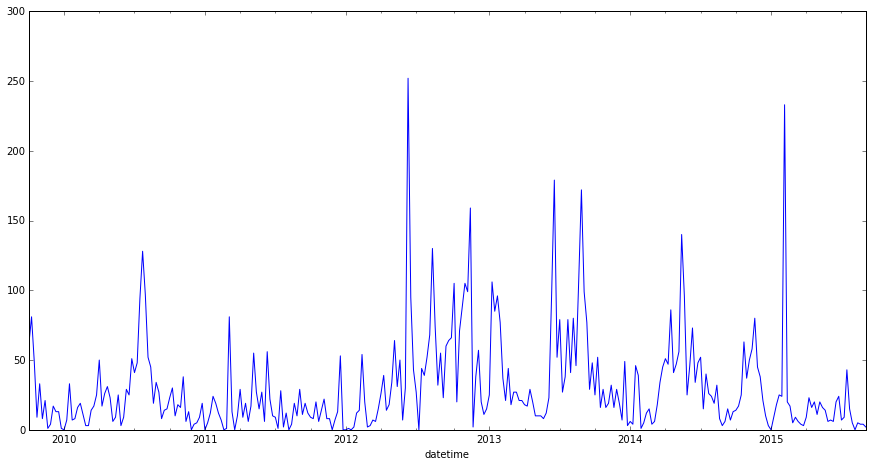

In [40]:
fig = plt.figure(figsize=(15, 7.5));
geonode_git_weekly.plot()

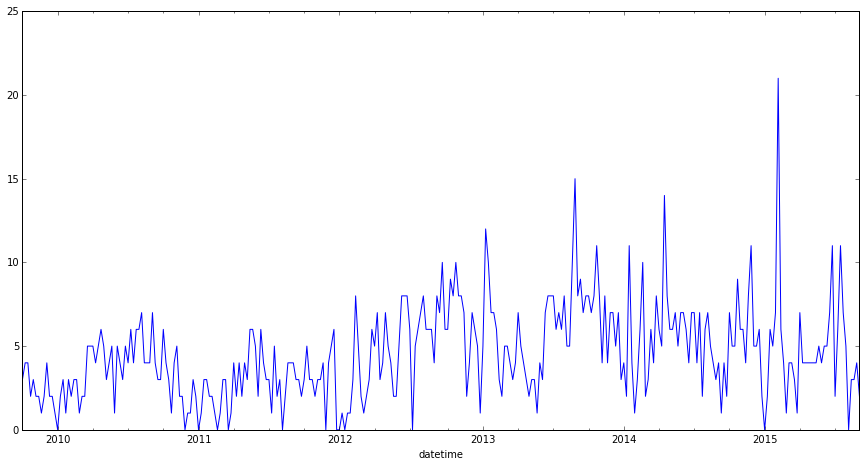

In [63]:
import pandas as pd
geonode_unique_committer = geonode_git_indexed['Person-ID'].resample("W", how=pd.Series.nunique)
fig = plt.figure(figsize=(15, 7.5));
geonode_unique_committer.plot()

In [97]:

geonode_git_grouped = geonode_git_df.groupby("Committer Name")["Committer Name"]\
                                    .agg({"Commit Count":"count", "Committer Name": "first"})\
                                    .sort("Commit Count", ascending=False)
        
print("Percentage of Commits by top ten committers")
float(geonode_git_grouped[:10]['Commit Count'].sum())/float(geonode_git_grouped['Commit Count'].sum())*100


Percentage of Commits by top ten committers


70.49214880387818

In [98]:
import networkx as nx;

In [101]:
#Borrowed from https://github.com/sbenthall/bigbang/blob/master/examples/Git%20Diffs.ipynb

G = nx.Graph()

def add_to_graph(r): # Adds info from row to graph
    author = r["Committer Name"]
    files = r["Touched File"]
    for f in files:
        if G.has_edge(author, f):
            G[author][f]['weight'] += 1
        else:
            G.add_edge(author, f, weight = 1)
            G.node[author]["type"] = 'author'
            G.node[f]["type"] = 'file'
        
a = geonode_git_df.apply(add_to_graph, axis=1) # Dummy to make it not print
widths = [G[u][v]['weight']/20.0 for u, v in G.edges()]

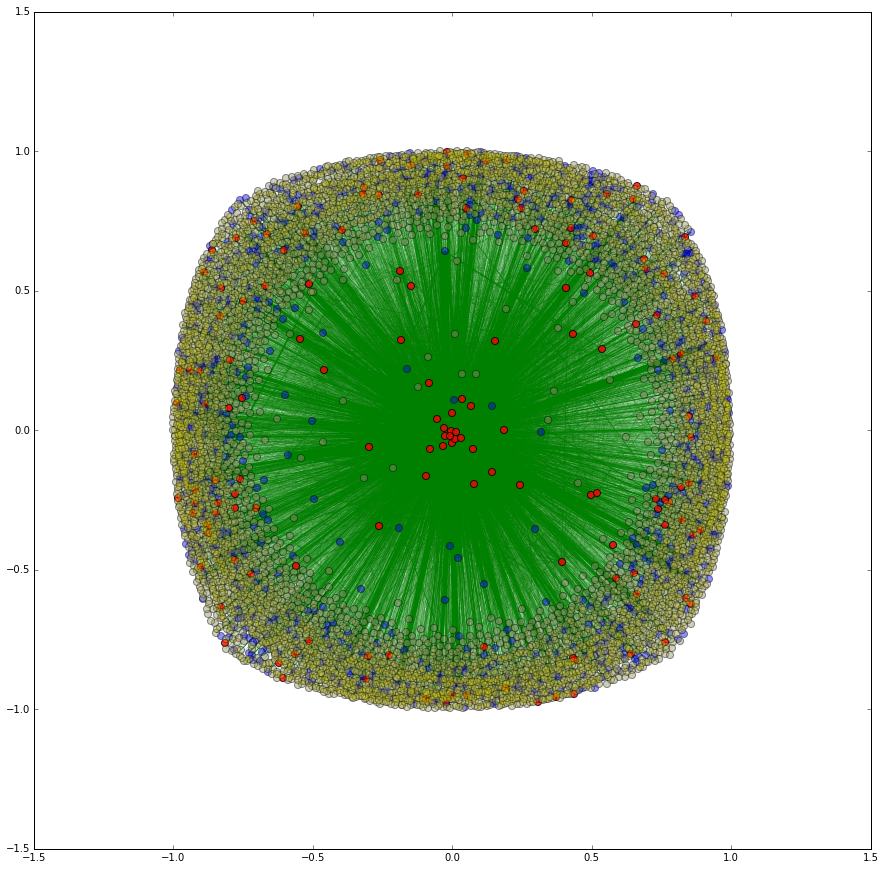

In [117]:
plt.figure(1,figsize=(15, 15))
pos = nx.spring_layout(G, k = 0.6, iterations = 20)
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'file'], node_size=50, alpha=0.25, node_color = 'b')
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'author'], node_size=50, alpha=0.8, node_color = 'r')
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'file' and '.py' in node[0]], node_size=50, alpha=0.25, node_color = 'b')
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'file' and '.py' not in node[0]], node_size=50, alpha=0.25, node_color = '#FFFF00')
nx.draw_networkx_edges(G, pos, width=widths, edge_color = 'g', alpha = 0.8)

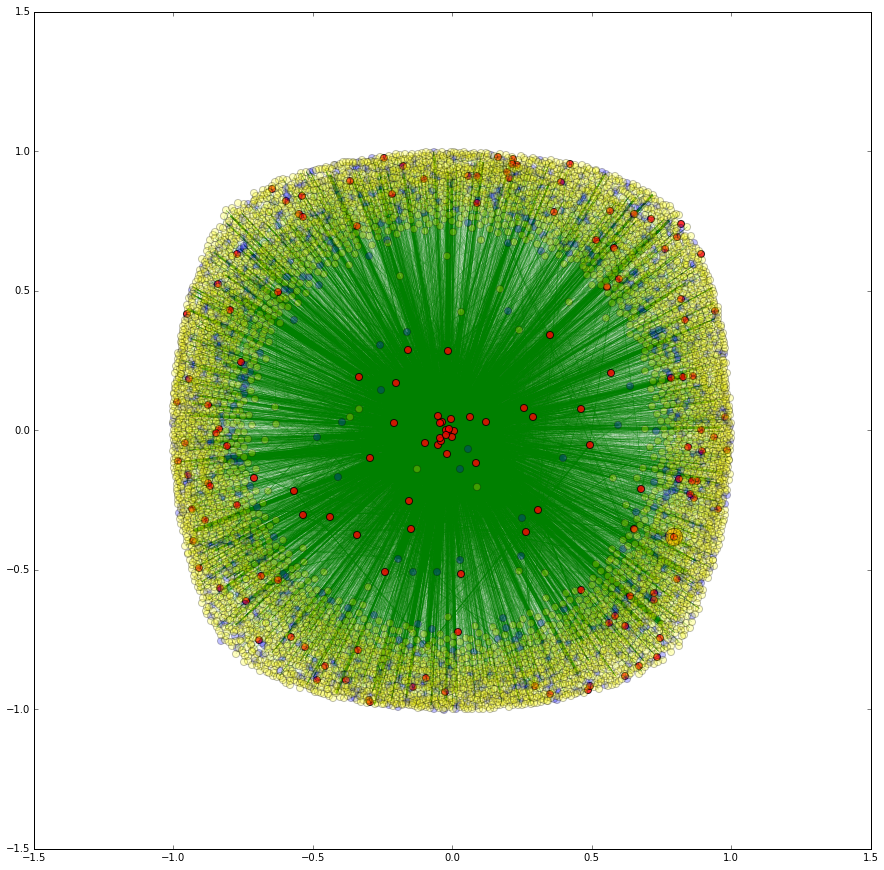

In [118]:
plt.figure(1,figsize=(15, 15))
pos = nx.spring_layout(G, k = 0.6, iterations = 20)
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'author' and "Hilbert" in node[0]], node_size=300, alpha=0.8, node_color = '#ffa500')
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'author'], node_size=50, alpha=0.8, node_color = 'r')
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'file' and '.py' in node[0]], node_size=50, alpha=0.25, node_color = 'b')
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'file' and '.py' not in node[0]], node_size=50, alpha=0.25, node_color = '#FFFF00')
nx.draw_networkx_edges(G, pos, width=widths, edge_color = 'g', alpha = 0.8)

In [ ]:
# TO DO
# - extract mailing lists, PRs, and Issues (it's not always about the code)
# - timeseries network of the above extracted data (Bokeh? see https://github.com/bokeh/bokeh/issues/187)